# Survey

In [2]:
import csv
from tkinter import filedialog

import matplotlib.pyplot as plt
import pandas as pd

from keys import *

# # bit clunky in a notebook
# stdFilePath = "data"
# selectedFile = filedialog.askopenfilename(initialdir=stdFilePath,
#                                           title="Select file",
#                                           filetypes=(("Only logs", "*.csv"),
#                                                      ("all files", "*.*")))
# if selectedFile == "":
#     exit("[ERR] Please select a file")

selectedFile = "data/example.csv"
df = pd.read_csv(selectedFile,
                 encoding="utf-16",
                 skiprows=range(1, 2),
                 header=0
                 )


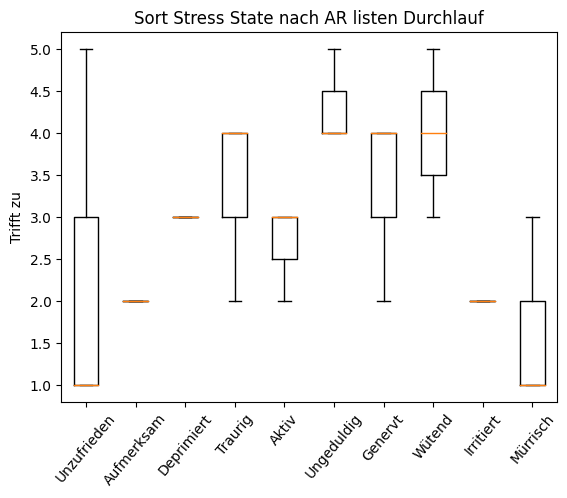

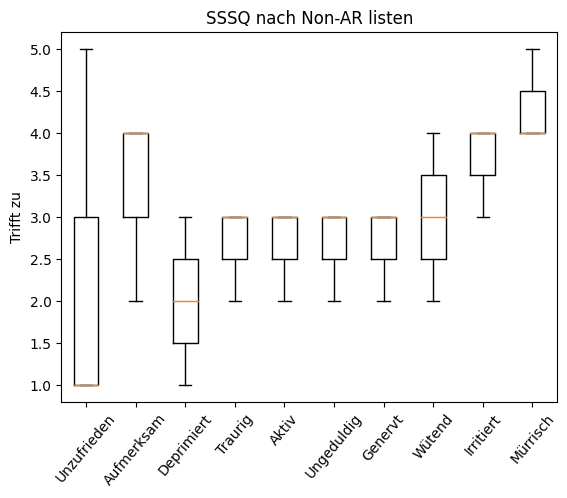

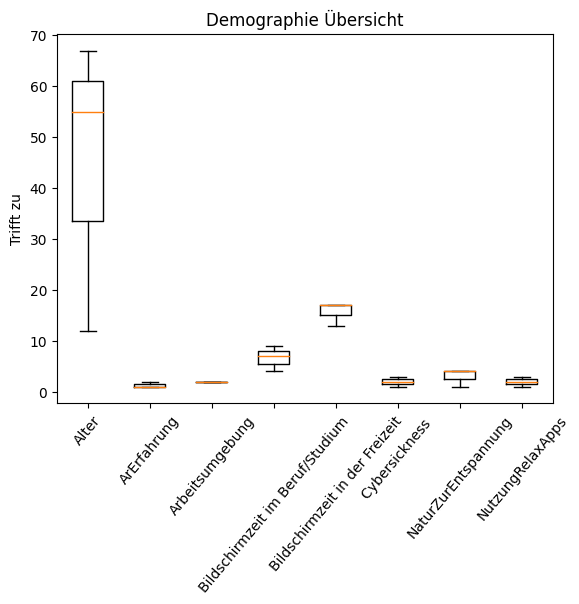

In [9]:
# df.head()
# df.dtypes
# df.columns
# df["SS01_01"].describe()

plt.boxplot(x=df[SSSQ_AR_Listen_Scale_Keys], labels=SSSQ_Scale_Names)
plt.xticks(rotation=50)
plt.title("Sort Stress State nach AR listen Durchlauf")
plt.ylabel("Trifft zu")
plt.show()


def makeBoxPlot(data, lables, title, rot=50, ylabel="Trifft zu", save=False):
    plt.figure()
    plt.boxplot(x=data, labels=lables)
    plt.xticks(rotation=rot)
    plt.title(title)
    plt.ylabel(ylabel)
    if save:
        plt.savefig(title)
    plt.show

makeBoxPlot(df[SSSQ_NonAR_Listen_Scale_Keys], SSSQ_Scale_Names, "SSSQ nach Non-AR listen")

makeBoxPlot(df[Demographic_Keys[:-1]], Demographic_Names[:-1], "Demographie Übersicht")


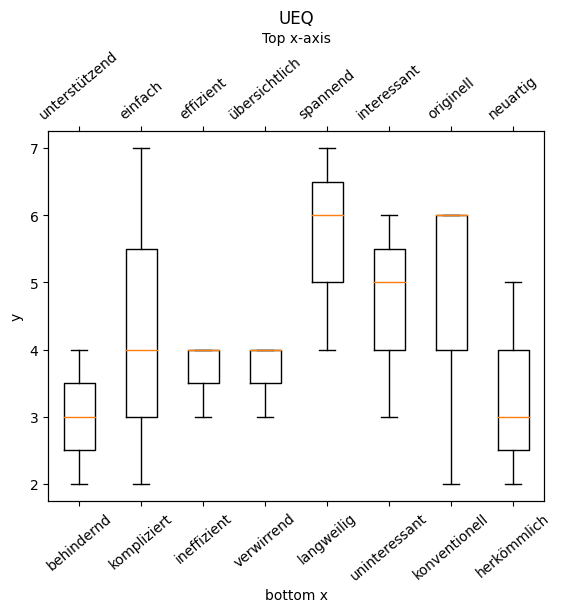

In [10]:

rot = 40
fig, ax = plt.subplots()
ax.boxplot(x=df[ShortUserExpQ_Keys])
ax.set_xlabel('bottom x')
ax.set_ylabel('y')
ax.set_title('UEQ')
ax.set_xticklabels(labels=ShortUserExpQ_Names_left, rotation=rot)

ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(labels=ShortUserExpQ_Names_right, rotation=rot)
ax2.set_xlabel("Top x-axis")

plt.show()


# Headtracking

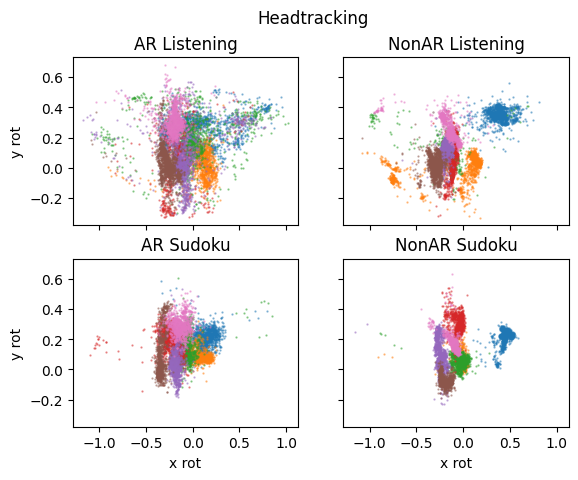

In [77]:
import glob

import matplotlib.pyplot as plt
import pandas as pd

headtracking_files = glob.glob("data/headtracking/*.csv")
headtracking_dfs = (pd.read_csv(file) for file in headtracking_files)


fig, axs = plt.subplots(2, 2)

for i in headtracking_dfs:
    alpha = 0.5
    size = 0.4

    axs[0, 0].set_title("AR Listening")
    axs[0, 1].set_title("NonAR Listening")
    axs[1, 0].set_title("AR Sudoku")
    axs[1, 1].set_title("NonAR Sudoku")

    arlisten = i.loc[(i["ARorNonAR"]=="AR") & (i["Tasktype"]=="Listening")]
    nonarlisten = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Listening")]
    arsudoku = i.loc[(i["ARorNonAR"]=="AR") & (i["Tasktype"]=="Sudoku")]
    nonarsudoku = i.loc[(i["ARorNonAR"]=="NonAR") & (i["Tasktype"]=="Sudoku")]

    axs[0, 0].scatter(arlisten["rotX"], arlisten["rotY"], alpha=alpha, s=size)
    axs[0, 1].scatter(nonarlisten["rotX"], nonarlisten["rotY"], alpha=alpha, s=size)
    axs[1, 0].scatter(arsudoku["rotX"], arsudoku["rotY"], alpha=alpha, s=size)
    axs[1, 1].scatter(nonarsudoku["rotX"], nonarsudoku["rotY"], alpha=alpha, s=size)


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.set(xlabel='x rot', ylabel='y rot')
    ax.label_outer()
    # use shared or custom below
    ax.sharex(axs[0,0])
    ax.sharey(axs[0,0])

# Custom axis sizes
# Xlim = (-1.5, 1.5)
# Ylim = (-0.4, 0.75)
# plt.setp(axs, xlim=Xlim, ylim=Ylim)

fig.suptitle("Evalutation of headtracking data")
# plt.tight_layout()
plt.show()